In [1]:
import pandas as pd
import numpy as np

In [4]:
columns = ["uid", "user_city", "item_id", "author_id", "item_city",
            "channel", "finish", "like", "music_id", "device",
            "create_time", "duration_time"]

In [5]:
data = pd.read_csv("../../data/track2/final_track2_train.txt", sep='\t', names=columns)

In [6]:
data.head()

,uid,user_city,item_id,author_id,item_city,channel,finish,like,music_id,device,create_time,duration_time
0,57384,52,43192,142828,0,0,0,0,4513,34178,53085993699,39
1,3230,5,46822,231026,1,0,1,0,5330,24878,53086372896,16
2,1249,328,1209078,456220,2,0,0,0,39979,14274,53086458433,4
3,11928,8,1209079,456221,3,0,0,0,-1,16649,53086463774,9
4,51266,89,1209080,126416,4,0,1,0,-1,27090,53086432937,19


In [12]:
data["fl_00"] = 0 # data[(data.finish == 0)&(data.like == 0)]
data["fl_01"] = 0
data["fl_11"] = 0
data["fl_10"] = 0

In [13]:
data["fl_00"][(data.finish == 0)&(data.like == 0)] = 1
data["fl_01"][(data.finish == 0)&(data.like == 1)] = 1
data["fl_11"][(data.finish == 1)&(data.like == 1)] = 1
data["fl_10"][(data.finish == 1)&(data.like == 0)] = 1

In [16]:
print (data[data.fl_00 == 1].shape)
print (data[data.fl_01 == 1].shape)
print (data[data.fl_11 == 1].shape)
print (data[data.fl_10 == 1].shape)

(12064910, 16)
(102771, 16)
(113171, 16)
(7341488, 16)


In [17]:
data.head()

,uid,user_city,item_id,author_id,item_city,channel,finish,like,music_id,device,create_time,duration_time,fl_00,fl_01,fl_11,fl_10
0,57384,52,43192,142828,0,0,0,0,4513,34178,53085993699,39,1,0,0,0
1,3230,5,46822,231026,1,0,1,0,5330,24878,53086372896,16,0,0,0,1
2,1249,328,1209078,456220,2,0,0,0,39979,14274,53086458433,4,1,0,0,0
3,11928,8,1209079,456221,3,0,0,0,-1,16649,53086463774,9,1,0,0,0
4,51266,89,1209080,126416,4,0,1,0,-1,27090,53086432937,19,0,0,0,1


In [22]:
a = data.duration_time.value_counts()

In [29]:
data[data.music_id == -1].shape[0] / data.shape[0]

0.6412263267275973

# 一些可视化

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv("../../cache/track2/tmp/all_data.csv")

In [3]:
data.head()

,uid,user_city,item_id,author_id,item_city,channel,finish,like,music_id,device,create_time,duration_time,fl_00,fl_01,fl_11,fl_10,target
0,57384,53,43192,142828,1,0,0,0,4514,34178,53085993699,39,0,0,0,0,0
1,3230,6,46822,231026,2,0,1,0,5331,24878,53086372896,16,0,0,0,3,3
2,1249,329,1209078,456220,3,0,0,0,39980,14274,53086458433,4,0,0,0,0,0
3,11928,9,1209079,456221,4,0,0,0,0,16649,53086463774,9,0,0,0,0,0
4,51266,90,1209080,126416,5,0,1,0,0,27090,53086432937,19,0,0,0,3,3


Text(0.5,1,'finish in like')

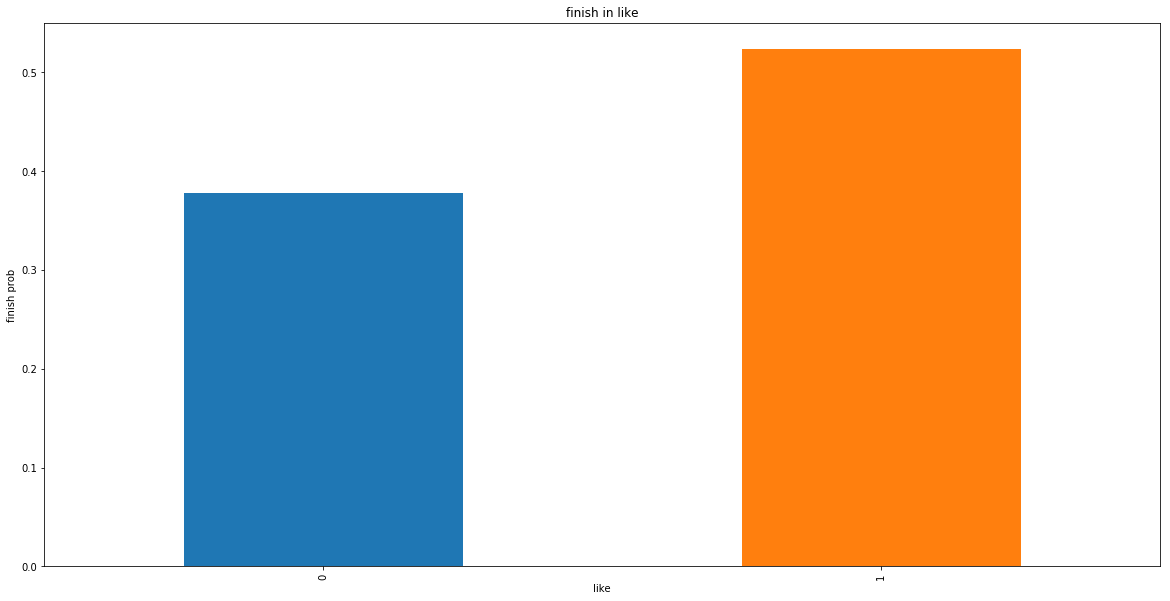

In [9]:
plt.figure(figsize=(20, 10))
data.groupby("like")["finish"].mean().plot(kind="bar")
plt.ylabel("finish prob")
plt.title("finish in like")